In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report


In [3]:
df = pd.read_csv("./Resources/creditcardfraud_normalised.csv")
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,...,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0
284803,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,...,0.564933,0.553154,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0
284804,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,...,0.565220,0.537005,0.664877,0.468492,0.592823,0.411176,0.416593,0.312585,0.002642,0
284805,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,...,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0


In [4]:
from collections import Counter
#
target = df.values[:, -1]
counter = Counter(target)
for k,v in counter.items():
  per = v/len(target)*100
  print("Class=%d, Count=%d, Percentage=%.3f%%" % (k,v, per))

Class=0, Count=284315, Percentage=99.827%
Class=1, Count=492, Percentage=0.173%


# Confirmation of normalization of the data

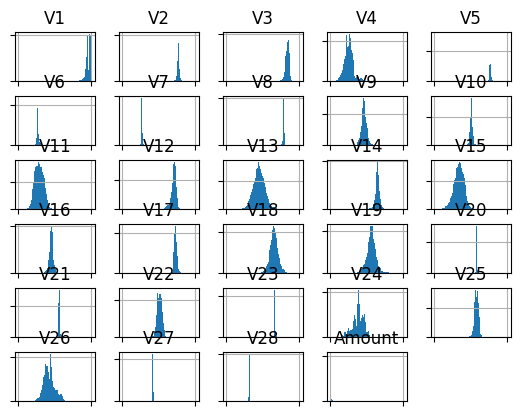

In [5]:
from matplotlib import pyplot
# define the dataset location
# load the csv file as a data frame
# drop the target variable
df_features = df.drop("class", axis=1)
# create a histogram plot of each numeric variable
ax = df_features.hist(bins=100)
# disable axis labels to avoid the clutter
for axis in ax.flatten():
 axis.set_xticklabels([])
 axis.set_yticklabels([])
# show the plot
pyplot.show()

In [16]:
# Assign X and y values
y = df["class"]
X = df_features      
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
Labels = df["class"].values
Features = df.drop(columns="class").values

In [7]:
X_train.shape, X_test.shape

((213605, 29), (71202, 29))

# Logistic Regression

In [7]:
# Train a Logistic Regression model print the model score
# Step 1: Instantiate model
model = LogisticRegression()
# Step 2: # Fit the model to the tarinig data
model.fit(X_train, y_train)
# Evaluate the model
print("Train R2 Score: ", model.score(X_train, y_train))
print("Test R2 Score: ", model.score(X_test, y_test))

Train R2 Score:  0.999059010790946
Test R2 Score:  0.9990590151962023


In [8]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
#Assess other metrics for the model
y_true = y_test
y_pred = model.predict(X_test)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.82      0.52      0.64       113

    accuracy                           1.00     71202
   macro avg       0.91      0.76      0.82     71202
weighted avg       1.00      1.00      1.00     71202



# Random Forest Classifier

In [9]:
# Fit a Random Forests classifier to the data
from sklearn.ensemble import RandomForestClassifier

# Step 1: Instantiate model
clf = RandomForestClassifier(random_state=1, n_estimators=500)

In [10]:
# Fit a Random Forests classifier to the data
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [11]:
print(f"Training Score: {clf.score(X_train, y_train)}")
print(f"Testing Score: {clf.score(X_test, y_test)}")

Training Score: 1.0
Testing Score: 0.9995786635206876


In [13]:
#Assess other metrics for the model
y_true = y_test
y_pred = clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.93      0.80      0.86       113

    accuracy                           1.00     71202
   macro avg       0.96      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



# Feature selection

[0.01497329 0.01296178 0.01680538 0.02674904 0.01202921 0.01347582
 0.02858586 0.0118125  0.0337078  0.07610422 0.08313057 0.13801841
 0.01028483 0.12263148 0.01249238 0.06603224 0.1654648  0.02422289
 0.01235093 0.01271128 0.01688784 0.01068915 0.00705603 0.00914263
 0.00928008 0.01887234 0.01202776 0.00994557 0.01155389]


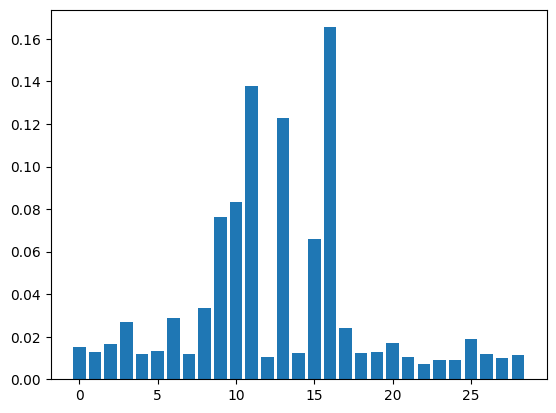

In [14]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [15]:
# Import SelectFromModel, create a selection model, and fit it to the training data
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train, y_train)
sel.get_support()

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True, False,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [16]:
# Use the selection model to create a dataset with only the selected features
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

In [17]:
# Create a RFC model, and fit it to the original dataset
new_clf = RandomForestClassifier().fit(X_selected_train, y_train)
print(f'Training Score: {new_clf.score(X_selected_train, y_train)}')
print(f'Testing Score: {new_clf.score(X_selected_test, y_test)}')

Training Score: 1.0
Testing Score: 0.9994663071262043


In [18]:
predictions = new_clf.predict(X_selected_test)

In [19]:
# Print the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.90      0.74      0.81       111

    accuracy                           1.00     71202
   macro avg       0.95      0.87      0.91     71202
weighted avg       1.00      1.00      1.00     71202



# K nearest neighbors

k: 1, Train/Test Score: 1.000/0.997
k: 3, Train/Test Score: 0.998/0.998
k: 5, Train/Test Score: 0.998/0.998
k: 7, Train/Test Score: 0.998/0.998
k: 9, Train/Test Score: 0.998/0.998
k: 11, Train/Test Score: 0.998/0.998
k: 13, Train/Test Score: 0.998/0.998
k: 15, Train/Test Score: 0.998/0.998
k: 17, Train/Test Score: 0.998/0.998
k: 19, Train/Test Score: 0.998/0.998


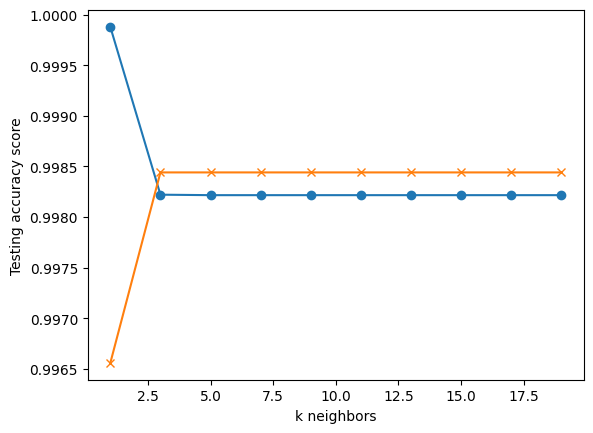

In [25]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [8]:
# Note that k: 9 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test, y_test))

k=3 Test Acc: 0.999


In [9]:
y_true = y_test
y_pred1 = knn.predict(X_test)

In [10]:
# Print the classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.88      0.74      0.81       113

    accuracy                           1.00     71202
   macro avg       0.94      0.87      0.90     71202
weighted avg       1.00      1.00      1.00     71202



## ROC Curve

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

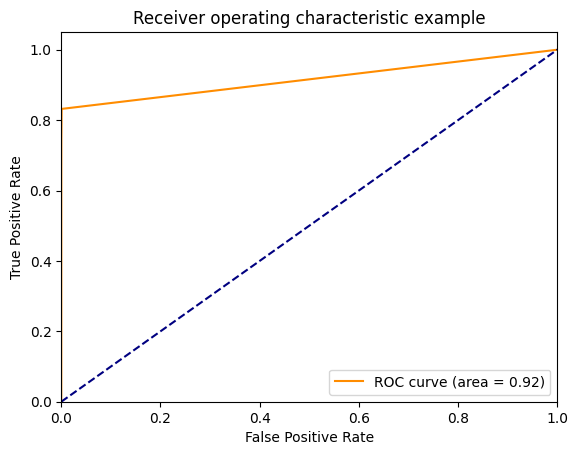

In [57]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machine with class weights

In [50]:
# define model
weights = {0:1.0, 1:2}
model_svm = SVC(kernel='linear', gamma='scale', class_weight=weights)

In [51]:
model_svm.fit(X_train, y_train)

SVC(class_weight={0: 1.0, 1: 2}, kernel='linear')

In [52]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions1 = model_svm.predict(X_test)

In [53]:
y_true = y_test
print(classification_report(y_true, predictions1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.75      0.81      0.78       113

    accuracy                           1.00     71202
   macro avg       0.88      0.90      0.89     71202
weighted avg       1.00      1.00      1.00     71202



### Note: class weights between 2 to 50 assigned to minority group still produced the same precision, recall, and f1 scores. There was no improvement in the score. Greater value than 50 for minority class resulted in very low precision. 

## SVM without class weights

In [30]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [31]:
print('Test Acc: %.3f' % svm.score(X_test, y_test))

Test Acc: 0.999


In [32]:
# Calculate the classification report
from sklearn.metrics import classification_report
predict = svm.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.81      0.78      0.80       113

    accuracy                           1.00     71202
   macro avg       0.91      0.89      0.90     71202
weighted avg       1.00      1.00      1.00     71202



## Extra Tree Classifier

In [23]:
# Import an Extremely Random Trees classifier
from sklearn.ensemble import ExtraTreesClassifier

In [29]:
clf1 = ExtraTreesClassifier(random_state=1).fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.91      0.79      0.84       113

    accuracy                           1.00     71202
   macro avg       0.95      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202



## Adaboost Classifier

In [26]:
# Import an Adaptive Boosting classifier
from sklearn.ensemble import AdaBoostClassifier

In [28]:
clf2 = AdaBoostClassifier(random_state=1).fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.78      0.70      0.74       113

    accuracy                           1.00     71202
   macro avg       0.89      0.85      0.87     71202
weighted avg       1.00      1.00      1.00     71202

